In [20]:
import os, sys
try:
    from ..quantata.ratio import *
    from ..quantata.backtest import calc_signal, simulate, calc_asset, calc_return
except ImportError:
    sys.path.append(os.path.dirname(os.path.abspath("./")))
    from quantata.ratio import *
    from quantata.backtest import calc_signal, simulate, calc_asset, calc_return

In [21]:
import pandas as pd
import seaborn as sns
import yfinance as yf
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [22]:
df = yf.Ticker("AAPL").history(period="1y")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-08-20 to 2022-08-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    float64
 6   Stock Splits  252 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 15.8 KB


In [23]:
df["MA"] = calc_ma(df.Close, 3)
df["EMA"] = calc_ema(df.Close, 3)
df["MACD"] = calc_macd(df.Close, 12, 26)
df["MACDSignal"] = calc_macd_signal(df.Close, 12, 26, 9)
df["MACDOscillator"] = calc_macd_oscillator(df.Close, 12, 26, 9)

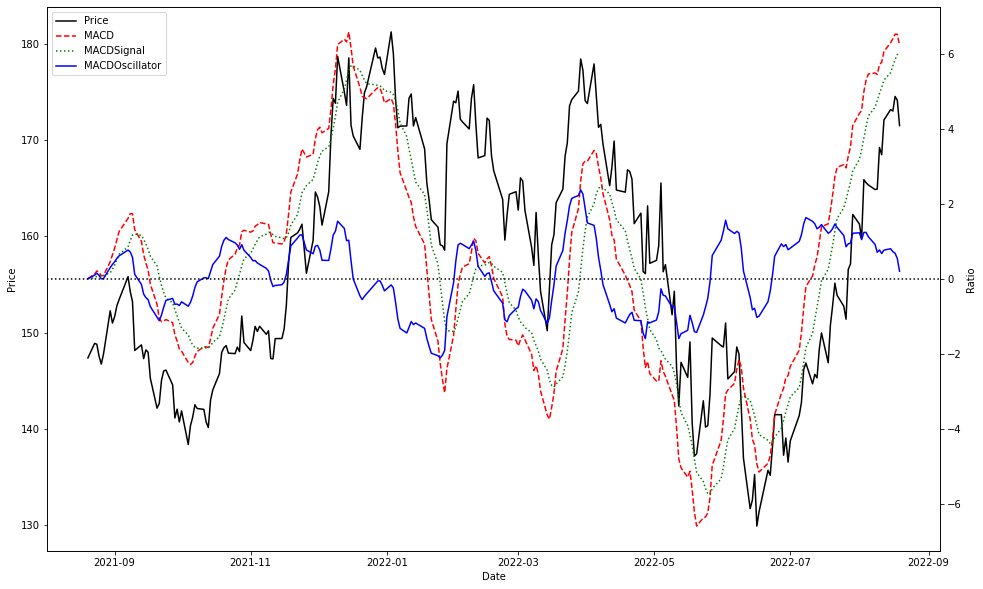

In [24]:
df_new = df[["MACD", "MACDSignal", "MACDOscillator"]].stack().reset_index()
df_new.columns = ["Date", "RatioName", "Ratio"]
plt.subplots(figsize=(16, 10))
ax1 = sns.lineplot(data=df, x="Date", y="Close", legend=False, color="k")
plt.ylabel("Price")
ax2 = ax1.twinx()
sns.lineplot(
    data=df_new, x="Date", y="Ratio", hue="RatioName", legend=False,
    palette={"MACD": "r", "MACDSignal": "g", "MACDOscillator": "b"}, ax=ax2
)
ax2.axhline(y=0, color='k', linestyle=":")
ax2.lines[0].set_linestyle("--")
ax2.lines[1].set_linestyle(":")
plt.legend(handles=[
    Line2D([0], [0], label="Price", color="k"),
    Line2D([0], [0], label="MACD", color="r", linestyle="--"),
    Line2D([0], [0], label="MACDSignal", color="g", linestyle=":"),
    Line2D([0], [0], label="MACDOscillator", color="b"),
])

In [25]:
df["Signal"] = calc_signal(df.MACDOscillator, 0, 0)
df["Amount"], df["Volume_"], df["Fee"], df["Position"], df["Capital"] = simulate(df.Close, df.Signal, 10_000_000)
df["Asset"] = calc_asset(df.Close, df.Position, df.Capital)
print(calc_return(df.Asset))

0.0005411247772216797


<AxesSubplot:xlabel='Date', ylabel='Asset'>

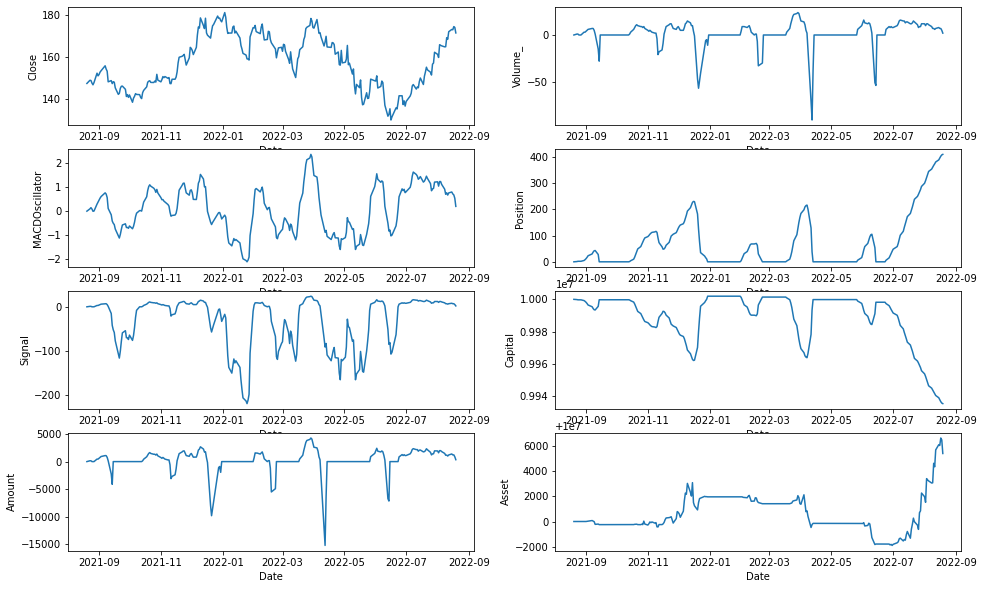

In [26]:
_, axes = plt.subplots(4, 2, figsize=(16, 10))
sns.lineplot(data=df, x="Date", y="Close", ax=axes[0][0])
sns.lineplot(data=df, x="Date", y="MACDOscillator", ax=axes[1][0])
sns.lineplot(data=df, x="Date", y="Signal", ax=axes[2][0])
sns.lineplot(data=df, x="Date", y="Amount", ax=axes[3][0])
sns.lineplot(data=df, x="Date", y="Volume_", ax=axes[0][1])
sns.lineplot(data=df, x="Date", y="Position", ax=axes[1][1])
sns.lineplot(data=df, x="Date", y="Capital", ax=axes[2][1])
sns.lineplot(data=df, x="Date", y="Asset", ax=axes[3][1])

In [27]:
df["AU"], df["AD"], df["RSI"] = calc_rsi(df.Close, 14)

c:\Users\ap5176\Data\quantata\quantata\ratio.py:74: RuntimeWarning: invalid value encountered in true_divide
  rsis = aus / (aus + ads) * 100


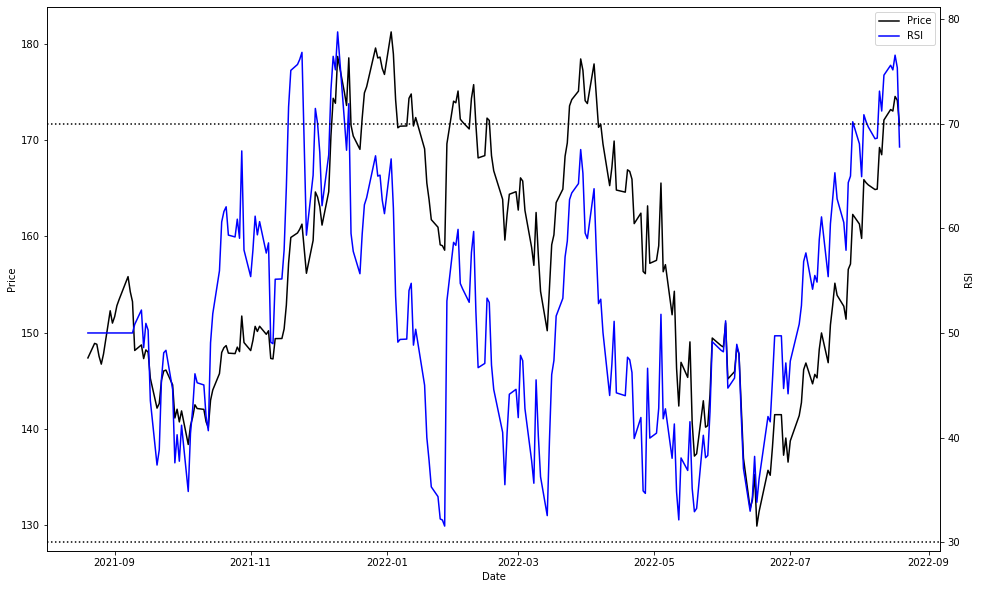

In [28]:
plt.subplots(figsize=(16, 10))
ax1 = sns.lineplot(data=df, x="Date", y="Close", legend=False, color="k")
plt.ylabel("Price")
ax2 = ax1.twinx()
sns.lineplot(data=df, x="Date", y="RSI", legend=False, color="b", ax=ax2)
ax2.axhline(y=70, color='k', linestyle=":")
ax2.axhline(y=30, color='k', linestyle=":")
plt.legend(handles=[
    Line2D([0], [0], label="Price", color="k"),
    Line2D([0], [0], label="RSI", color="b"),
])

In [29]:
df["Signal"] = calc_signal(df.RSI, 30, 70, buy_at_high_ratio=False)
df["Amount"], df["Volume_"], df["Fee"], df["Position"], df["Capital"] = simulate(df.Close, df.Signal, 10_000_000)
df["Asset"] = calc_asset(df.Close, df.Position, df.Capital)
print(calc_return(df.Asset))

0.0


<AxesSubplot:xlabel='Date', ylabel='Asset'>

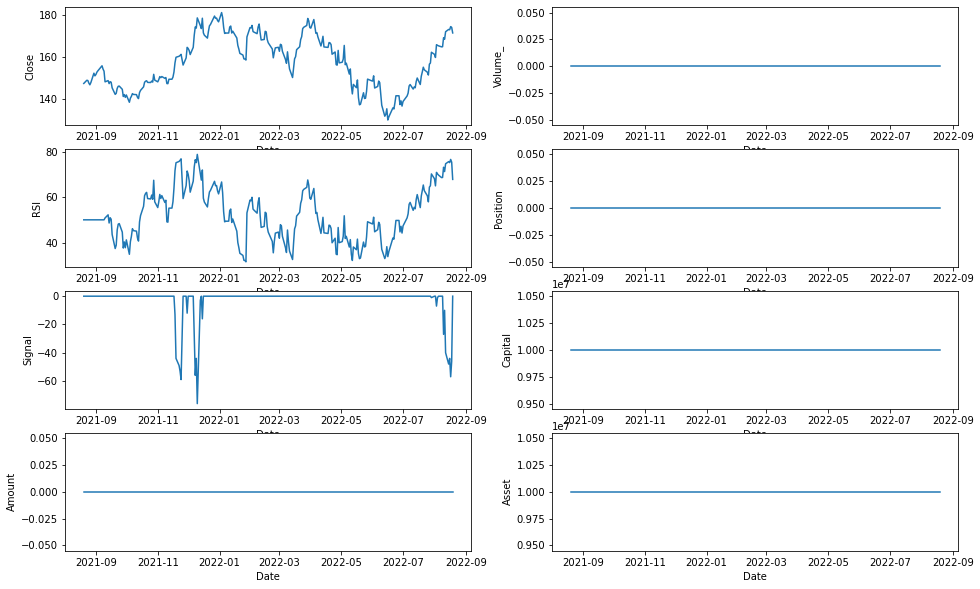

In [30]:
_, axes = plt.subplots(4, 2, figsize=(16, 10))
sns.lineplot(data=df, x="Date", y="Close", ax=axes[0][0])
sns.lineplot(data=df, x="Date", y="RSI", ax=axes[1][0])
sns.lineplot(data=df, x="Date", y="Signal", ax=axes[2][0])
sns.lineplot(data=df, x="Date", y="Amount", ax=axes[3][0])
sns.lineplot(data=df, x="Date", y="Volume_", ax=axes[0][1])
sns.lineplot(data=df, x="Date", y="Position", ax=axes[1][1])
sns.lineplot(data=df, x="Date", y="Capital", ax=axes[2][1])
sns.lineplot(data=df, x="Date", y="Asset", ax=axes[3][1])

In [31]:
df["EnvelopeUB"], df["EnvelopeLB"] = calc_envelope(df.Close, 20)
df["EnvelopeEMAUB"], df["EnvelopeEMALB"] = calc_envelope(df.Close, 20, use_ema=True)

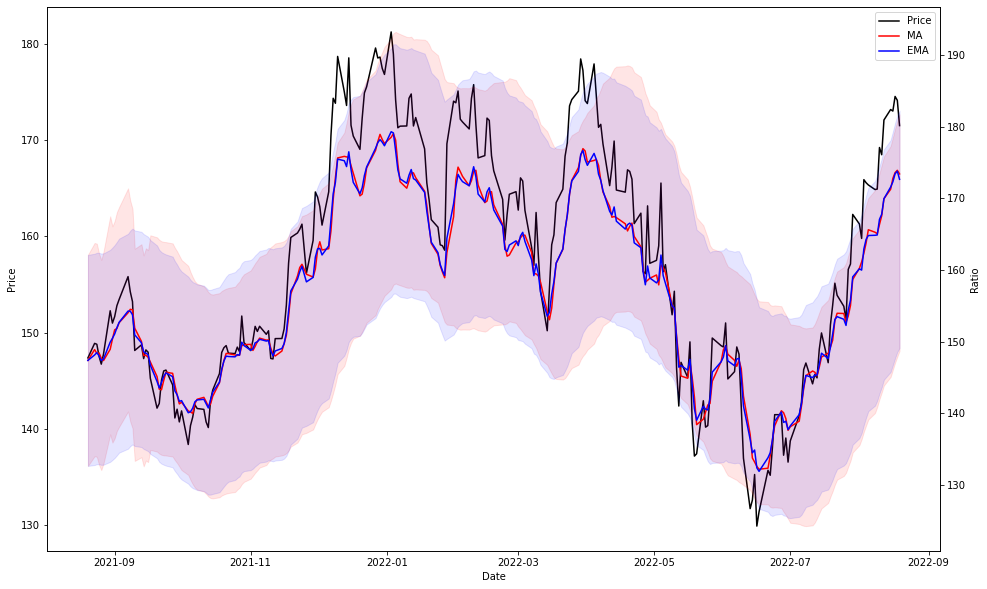

In [32]:
df_new = df[["MA", "EMA"]].stack().reset_index()
df_new.columns = ["Date", "RatioName", "Ratio"]
plt.subplots(figsize=(16, 10))
ax1 = sns.lineplot(data=df, x="Date", y="Close", legend=False, color="k")
plt.ylabel("Price")
ax2 = ax1.twinx()
sns.lineplot(
    data=df_new, x="Date", y="Ratio", hue="RatioName", legend=False,
    palette={"MA": "r", "EMA": "b"}, ax=ax2
)
plt.fill_between(df.index, df.EnvelopeUB, df.EnvelopeLB, color="r", alpha=0.1)
plt.fill_between(df.index, df.EnvelopeEMAUB, df.EnvelopeEMALB, color="b", alpha=0.1)
plt.legend(handles=[
    Line2D([0], [0], label="Price", color="k"),
    Line2D([0], [0], label="MA", color="r"),
    Line2D([0], [0], label="EMA", color="b"),
])

In [41]:
df["Signal"] = calc_signal(df.Close, df.EnvelopeLB, df.EnvelopeLB, buy_at_high_ratio=False)
df["Amount"], df["Volume_"], df["Fee"], df["Position"], df["Capital"] = simulate(df.Close, df.Signal, 10_000_000)
df["Asset"] = calc_asset(df.Close, df.Position, df.Capital)
print(calc_return(df.Asset))

0.0


<AxesSubplot:xlabel='Date', ylabel='Asset'>

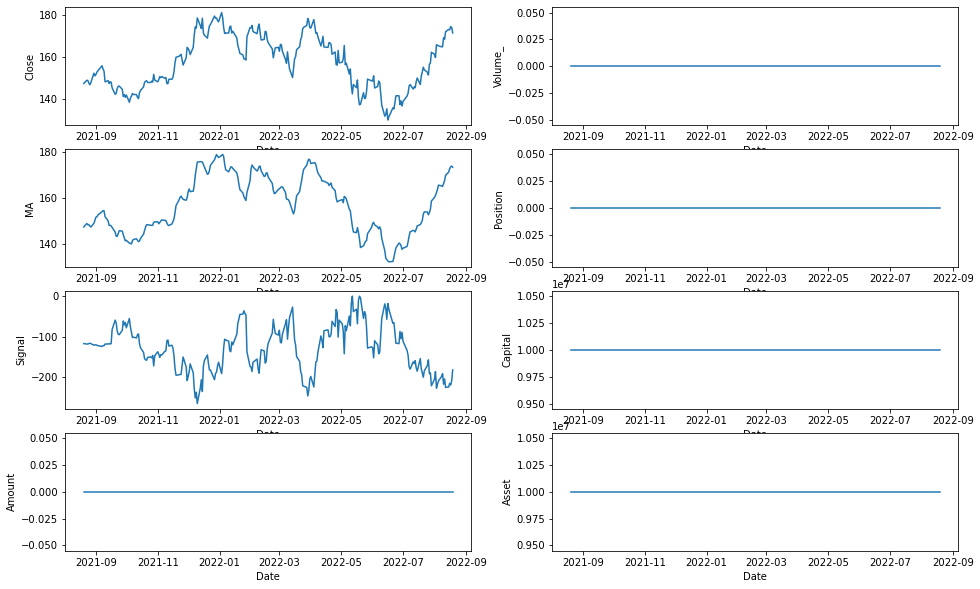

In [42]:
_, axes = plt.subplots(4, 2, figsize=(16, 10))
sns.lineplot(data=df, x="Date", y="Close", ax=axes[0][0])
sns.lineplot(data=df, x="Date", y="MA", ax=axes[1][0])
sns.lineplot(data=df, x="Date", y="Signal", ax=axes[2][0])
sns.lineplot(data=df, x="Date", y="Amount", ax=axes[3][0])
sns.lineplot(data=df, x="Date", y="Volume_", ax=axes[0][1])
sns.lineplot(data=df, x="Date", y="Position", ax=axes[1][1])
sns.lineplot(data=df, x="Date", y="Capital", ax=axes[2][1])
sns.lineplot(data=df, x="Date", y="Asset", ax=axes[3][1])

In [43]:
df["Signal"] = calc_signal(df.Close, df.EnvelopeEMALB, df.EnvelopeEMALB, buy_at_high_ratio=False)
df["Amount"], df["Volume_"], df["Fee"], df["Position"], df["Capital"] = simulate(df.Close, df.Signal, 10_000_000)
df["Asset"] = calc_asset(df.Close, df.Position, df.Capital)
print(calc_return(df.Asset))

0.0


<AxesSubplot:xlabel='Date', ylabel='Asset'>

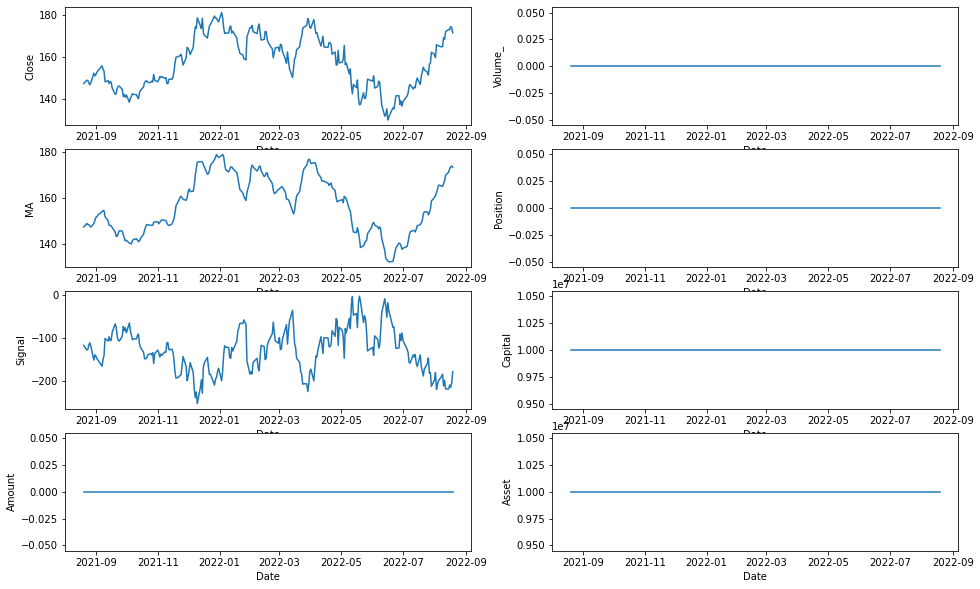

In [44]:
_, axes = plt.subplots(4, 2, figsize=(16, 10))
sns.lineplot(data=df, x="Date", y="Close", ax=axes[0][0])
sns.lineplot(data=df, x="Date", y="MA", ax=axes[1][0])
sns.lineplot(data=df, x="Date", y="Signal", ax=axes[2][0])
sns.lineplot(data=df, x="Date", y="Amount", ax=axes[3][0])
sns.lineplot(data=df, x="Date", y="Volume_", ax=axes[0][1])
sns.lineplot(data=df, x="Date", y="Position", ax=axes[1][1])
sns.lineplot(data=df, x="Date", y="Capital", ax=axes[2][1])
sns.lineplot(data=df, x="Date", y="Asset", ax=axes[3][1])